In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pickle
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
dataFrame = pd.read_csv("HepatitisCdata.csv")
dataFrame.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [3]:
dataFrame.drop("Unnamed: 0", axis=1, inplace=True)

In [4]:
categories = dataFrame['Category'].unique()
categories

array(['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis',
       '2=Fibrosis', '3=Cirrhosis'], dtype=object)

In [5]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALB       615 non-null    float64
 4   ALP       615 non-null    float64
 5   ALT       615 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      615 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      615 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 62.6+ KB


In [6]:
# Mapping numeric values

dataFrame['Category'] = dataFrame['Category'].map({'0=Blood Donor': 0, '0s=suspect Blood Donor': 0, 
                                     "1=Hepatitis" : 1, "2=Fibrosis" : 1, "3=Cirrhosis" : 1})

dataFrame['Sex'] = dataFrame['Sex'].map({'m': 1, 'f': 2})

In [7]:
dataFrame.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [8]:
# Checking the data types again after the transformation
dataFrame.dtypes

Category      int64
Age           int64
Sex           int64
ALB         float64
ALP         float64
ALT         float64
AST         float64
BIL         float64
CHE         float64
CHOL        float64
CREA        float64
GGT         float64
PROT        float64
dtype: object

In [9]:
# Checking for missing values in the dataset
dataFrame.isna().sum()

Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64

### The "Category" will be the y label (Dependent variable) and rest of the data will be the X or the input data (Independent variables).

In [10]:
# X data
X = dataFrame.drop(["Category"], axis=1)
X.head()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [11]:
# y data
y = dataFrame["Category"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Category, dtype: int64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
len(X_train), len(X_test), len(y_train), len(y_test)

(492, 123, 492, 123)

In [14]:
logisticRegression_model = LogisticRegression()
logisticRegression_model.fit(X_train, y_train)

c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
LogisticRegressionScore = logisticRegression_model.score(X_test, y_test)
print("Accuracy obtained by Logistic Regression model:",LogisticRegressionScore*100)

Accuracy obtained by Logistic Regression model: 88.6178861788618


### Model Accuracy 88.62%

In [16]:
X_predict = np.array([dataFrame.Age[0], dataFrame.Sex[0], dataFrame.ALB[0], dataFrame.ALP[0], dataFrame.ALT[0], dataFrame.AST[0], dataFrame.BIL[0], dataFrame.CHE[0], dataFrame.CHOL[0], dataFrame.CREA[0], dataFrame.GGT[0], dataFrame.PROT[0]])
X_predict.reshape(1, -1)

array([[ 32.  ,   1.  ,  38.5 ,  52.5 ,   7.7 ,  22.1 ,   7.5 ,   6.93,
          3.23, 106.  ,  12.1 ,  69.  ]])

In [17]:

# y_pridect = logisticRegression_model.predict(X_predict.reshape(1, -1))
y_predict = logisticRegression_model.predict(X_test)


y_predict

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

### Creating pickle file

In [18]:
pickle_fileName = 'Hepatisis_prediction_model'
pickle.dump(logisticRegression_model, open(pickle_fileName, 'wb'))

### Testing the prediction from the pickle file

In [19]:
loaded_model = pickle.load(open(pickle_fileName, 'rb'))
loaded_model.predict(X_predict.reshape(1, -1))

c:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

# Check the date balance

In [20]:
values_count = dataFrame.pivot_table(index = ['Category'], aggfunc ='size')
values_count

Category
0    540
1     75
dtype: int64

### The output seems that the data is imbalanced

# Confusion Matrix

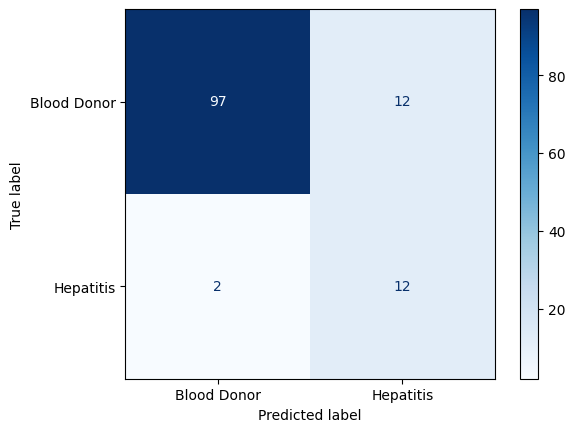

In [21]:

confusion_matrix = metrics.confusion_matrix(y_predict, y_test)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Blood Donor", "Hepatitis"])
# ax = confusion_matrix.figure_()
cm_display = cm_display.plot(cmap=plt.cm.Blues,values_format='g')
# cm_display.from_estimator(ax="violet")

# ax.set_facecolor("violet")

plt.show()

# Accuracy
## Accuracy measures how often the model is correct.

  **<dt>How to Calculate</dt>**
  $$\frac{(True Positive + True Negative)}{Total Predictions}$$

In [22]:
Accuracy = metrics.accuracy_score(y_predict, y_test)
Accuracy*100

88.6178861788618

# Precision
## Of the positives predicted, what percentage is truly positive?

**<dt> How to Calculate </dt>**
$$\frac{True Positive}{(True Positive + False Positive)}$$
### Precision does not evaluate the correctly predicted negative cases

In [23]:
Precision = metrics.precision_score(y_predict, y_test)
Precision*100

50.0

# Sensitivity (Recall)
## Of all the positive cases, what percentage are predicted positive

## Sensitivity (sometimes called Recall) measures how good the model is at predicting positives.

## This means it looks at true positives and false negatives (which are positives that have been incorrectly predicted as negative).

**<dt> How to Calculate </dt>**

$$\frac{True Positive}{(True Positive + False Negative)}$$

### Sensitivity is good at understanding how well the model predicts something is positive

In [24]:
Sensitivity_recall = metrics.recall_score(y_predict, y_test)
Sensitivity_recall*100

85.71428571428571

# Specificity
## How well the model is at prediciting negative results?

## Specificity is similar to sensitivity, but looks at it from the persepctive of negative results.

**<dt> How to Calculate </dt>**

$$\frac{True Negative}{(True Negative + False Positive)}$$

### Since it is just the opposite of Recall, we use the recall_score function, taking the opposite position label

In [25]:
Specificity = metrics.recall_score(y_predict, y_test)
Specificity*100

85.71428571428571